# Distillation

### Binary distillation assuming 100% separation on non-keys

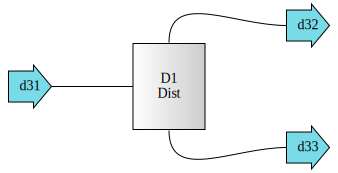

Distillation: D1
ins...
[0] d31
    phase: 'l', T: 75.379 degC, P: 1 atm
    flow: Water     0.421
          Methanol  0.492
          Glycerol  0.0869
          net       114 kmol/hr 
outs...
[0] d32
    phase: 'g', T: 64.91 degC, P: 1 atm
    flow: Water     0.01
          Methanol  0.99
          net       56.1 kmol/hr 
[1] d33
    phase: 'l', T: 100.09 degC, P: 1 atm
    flow: Water     0.82
          Methanol  0.00829
          Glycerol  0.171
          net       57.8 kmol/hr 

results...
{'Operation':
   {'Theoretical Feed Stage': 6,
   'Theoretical Stages': 27,
   'Minimum Reflux': 0.693,
   'Reflux': 0.762,
   'T_condenser': 338 (K),
   'T_boiler': 373 (K),
   'Cooling':-1.62e+06 (kJ/hr),
   'Heating': 3.69e+06 (kJ/hr)},
 'Design':
   {'Rectifier Stages': 19,
   'Stripper Stages': 44,
   'Actual Stages': 63,
   'Column Height': 31.7 (m),
   'Column Diameter': 0.768 (m),
   'Wall Thickness': 0.375 (in),
   'Weight': 1.24e+03 (lb)},
 'Cost':
   {'Tray Cost': 4.22e+04 (USD),
   'T

In [6]:
from biosteam import Species, Units, Stream

# Set up stream
Stream.species = Species('Water', 'Methanol', 'Glycerol')
stream = Stream(flow=(48, 56, 9.9))
stream.T = stream.bubble_point()[0] # For better operation

# Set up column
D1 = Units.Distillation('D1', LHK=('Methanol', 'Water'), y_top=0.99, x_bot=0.01, k=1.1)
D1.ins = stream

# Run all methods
D1.run()
D1.operation()
D1.design()
D1.cost()

# See all results
D1.diagram
D1.show(T='degC', P='atm', in_fractions= True)
print('\nresults...\n' + str(D1.results))
print('\nheat utilities...')
D1.heat_utilities[0].results.units['Cost'] = 'USD/yr'
for hu in D1.heat_utilities:
    print(hu.results)